In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [6]:
if os.path.isfile("ACT_Selected_Cancer_incidence_and_mortality.csv"):
    filepath = "ACT_Selected_Cancer_incidence_and_mortality.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/Health/ACT-Selected-Cancer-incidence-and-mortality/a2ku-4dqc"
    print("loading from the internet")

cancer_data = pd.read_csv(filepath)
print("done")

loading from file
done


Cancer Incidences and Mortalities in ACT 1985 - 2017 INTROCUTION / aim and purpose, questions i will look into

INTRODUCTION TO THE DATA

In [7]:
cancer_data.head()

,CancerType,IncidenceMortality,year,sex,NumberOfCases,AgeAdjustedRate,IncidenceMortality_Sex
0,Bowel C18-C20,Incidence,1985,Male,50,79.9,Incidence Male
1,Bowel C18-C20,Incidence,1986,Male,29,48.8,Incidence Male
2,Bowel C18-C20,Incidence,1987,Male,52,78.3,Incidence Male
3,Bowel C18-C20,Incidence,1988,Male,48,63.7,Incidence Male
4,Bowel C18-C20,Incidence,1989,Male,53,74.2,Incidence Male


fisrt scatter plot

<AxesSubplot:xlabel='year', ylabel='NumberOfCases'>

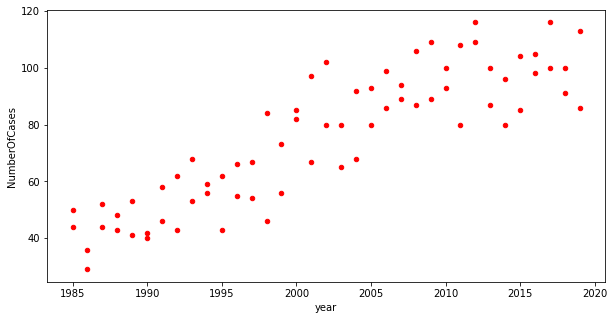

In [46]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male', 'Incidence Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_incidences = cancer_male_female[cancer_male_female["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel = cancer_incidences[cancer_incidences["CancerType"].isin(["Bowel C18-C20"])]
bowel.plot.scatter(x='year', y='NumberOfCases', c='red')